# Homer Analysis

One drawback of using Temoa to analyze energy systems is that it can't optimize over hourly load profiles. This means that Temoa will pathologically under utilize battery technology. To fix this, I ran a simple simulation using the HOMER tool from NREL. This simulation used only wind turbines (1.5 MW), generic flat plate PV, and 1 MWh LI batteries. Then, I conducted a sensitivity analysis over the "Capacity Shortage" parameter.

This analysis shows the required battery storage for guaranteed grid reliability. This information allows us to incorporate the capital and fixed costs of battery storage into the capital and fixed costs for solar and wind technology. That way, Temoa can deploy renewable technology and we can be confident that deployment will reflect high grid reliability. 

The load profile shown below is consistent with the profiles found in Zethmyer and Makhija (2019).

![IL load profile](../report/img/homer_illinois_loadprofile.png)

![System Setup](../report/img/homer_system_setup.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# homer_df = pd.read_csv('homer_illinois_data.csv', skiprows=1)
homer_df = pd.read_csv('illinois_renewable_scenario.csv', skiprows=1)
homer_df.fillna(0.0, inplace=True)
homer_df

,Sensitivity/Capacity Shortage (%),Architecture/PV (kW),Architecture/G1500,Architecture/100LI,Architecture/Converter (kW),Architecture/Dispatch,Cost/NPC ($),Cost/COE ($),Cost/Operating cost ($/yr),Cost/Initial capital ($),...,PV/Production (kWh/yr),G1500/Capital Cost ($),G1500/Production (kWh/yr),G1500/O&M Cost ($),100LI/Autonomy (hr),100LI/Annual Throughput (kWh/yr),100LI/Nominal Capacity (kWh),100LI/Usable Nominal Capacity (kWh),Converter/Rectifier Mean Output (kW),Converter/Inverter Mean Output (kW)
0,0,9.007355e+07,43724.0,3884516.0,5.038112e+07,CC,9.155185e+11,0.370604,1.552571e+10,6.433863e+11,...,1.229621e+11,1.311720e+11,2.863055e+11,1.311720e+09,19.306910,2.531520e+10,388452400.0,310761900.0,3046183.0,2604487.0
1,0,0.000000e+00,100507.0,7341569.0,9.021237e+07,CC,1.346186e+12,0.545006,2.873665e+10,8.424946e+11,...,0.000000e+00,3.015210e+11,6.581215e+11,3.015210e+09,36.489230,2.561196e+10,734158400.0,587326700.0,3081892.0,2635018.0
2,0,4.089760e+08,0.0,8145190.0,8.720737e+07,CC,2.122968e+12,0.859734,2.876585e+10,1.618765e+12,...,5.583051e+11,0.000000e+00,0.000000e+00,0.000000e+00,40.483410,7.472619e+10,814520600.0,651616500.0,8955237.0,7688004.0
3,10,0.000000e+00,54326.0,1384541.0,5.217345e+07,CC,4.151342e+11,0.181110,7.963692e+09,2.755479e+11,...,0.000000e+00,1.629780e+11,3.557275e+11,1.629780e+09,6.881477,2.348042e+10,138454400.0,110763500.0,2825404.0,2415721.0
4,10,2.011986e+06,42923.0,2037132.0,3.314285e+07,CC,4.444164e+11,0.192681,9.018531e+09,2.863411e+11,...,2.746622e+09,1.287690e+11,2.810605e+11,1.287690e+09,10.125000,2.817324e+10,203713600.0,162970900.0,3390091.0,2898528.0
5,10,2.019466e+08,0.0,3454025.0,8.023649e+07,CC,9.958339e+11,0.434992,1.284327e+10,7.707193e+11,...,2.756833e+11,0.000000e+00,0.000000e+00,0.000000e+00,17.167270,6.862558e+10,345403200.0,276322600.0,8224480.0,7060359.0
6,10,4.681548e+08,451562.0,0.0,0.000000e+00,CC,3.111019e+12,1.358119,3.342945e+10,2.525073e+12,...,6.390918e+11,1.354686e+12,2.956835e+12,1.354686e+10,0.000000,0.000000e+00,0.0,0.0,0.0,0.0
7,12,0.000000e+00,51558.0,1200846.0,4.468989e+07,CC,3.780791e+11,0.167498,7.185083e+09,2.521402e+11,...,0.000000e+00,1.546740e+11,3.376026e+11,1.546740e+09,5.968472,2.224882e+10,120084800.0,96067870.0,2677205.0,2289010.0
8,12,1.937254e+06,47339.0,1358439.0,3.123208e+07,CC,3.790518e+11,0.167406,7.287341e+09,2.513205e+11,...,2.644602e+09,1.420170e+11,3.099766e+11,1.420170e+09,6.751744,2.357337e+10,135844200.0,108675300.0,2836588.0,2425283.0
9,12,1.844128e+08,0.0,3466041.0,4.895140e+07,CC,9.364405e+11,0.414637,1.244308e+10,7.183402e+11,...,2.517473e+11,0.000000e+00,0.000000e+00,0.000000e+00,17.227000,6.763101e+10,346604800.0,277283800.0,8104687.0,6958035.0


In [3]:
keys = homer_df.keys()

In [4]:
battery_key = keys[3]

In [5]:
wind_key = keys[2]
solar_key = keys[1]

cap_shortage_key = keys[0]
shortage_values = np.unique(homer_df[cap_shortage_key])

In [6]:
shortage_values

array([ 0,  2,  5,  7, 10, 12, 15, 20], dtype=int64)

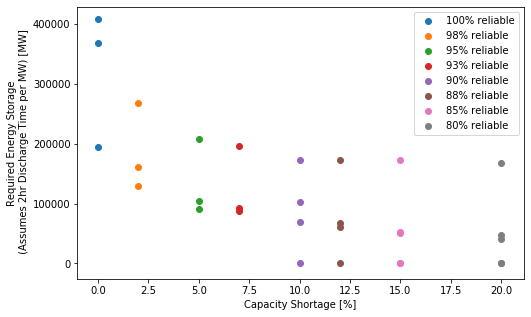

In [12]:
plt.figure(figsize=(8,5))
for s in shortage_values:
    df = homer_df[homer_df[cap_shortage_key] == s]
    x = df[cap_shortage_key]
    y = df[battery_key]*100/1000/2
    
    plt.scatter(x, y, label=f'{100-s}% reliable')
plt.xlabel("Capacity Shortage [%]")
plt.ylabel("Required Energy Storage\n (Assumes 2hr Discharge Time per MW) [MW]")
plt.legend()
plt.show()

In [15]:
storage_duration = 7341569.0*100/1000  # MWh
wind_installed = 100507.0*1.5  # MW
print(f"To ensure 100% reliability we need {round(storage_duration/wind_installed,3)} hours of storage duration for each MW of wind.")

To ensure 100% reliability we need 4.87 hours of storage duration for each MW of wind.


According to NREL ATB:

Battery Energy Capital Cost in 2021 (moderate): 280 ($/kWh)


Battery Capacity Capital Cost in 2021 (moderate): 244 ($/kW)

Total Cost = BECC*duration + BCCC

In [16]:
# Assume each storage installation is 2 MWh nad 

In [24]:
becc = 280
bccc = 244
fixed_om = 34.11 # M$/GW-year

system_cost = (becc*(storage_duration/wind_installed) + bccc) * 1000/1e6  # M$/MW
print(f"Wind and solar investment costs must be increased by {round(system_cost, 3)} M$/MW")
print(f"Wind and solar fixed costs must be increased by {round(fixed_om, 3)} M$/GW-year")

Wind and solar investment costs must be increased by 1.608 M$/MW
Wind and solar fixed costs must be increased by 34.11 M$/GW-year
